In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
print(fruits['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


In [4]:
print(fruits.shape)

(59, 7)


### Statistical Summary

In [5]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


We can see that the numerical values do not have the same scale. We will need to apply scaling to the test set that we computed for the training set.

### Fruit type distribution

In [6]:
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


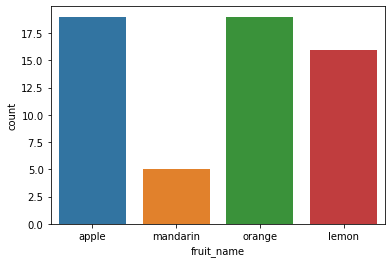

In [7]:
import seaborn as sns
sns.countplot(fruits['fruit_name'],label="Count")
plt.show()

The data is pretty balanced except mandarin. We will just have to go with it. 

With  box and whiskers we can identify the outliers. 

Box plot for each numeric variable will give us a clearer idea of the distribution of the input variables:

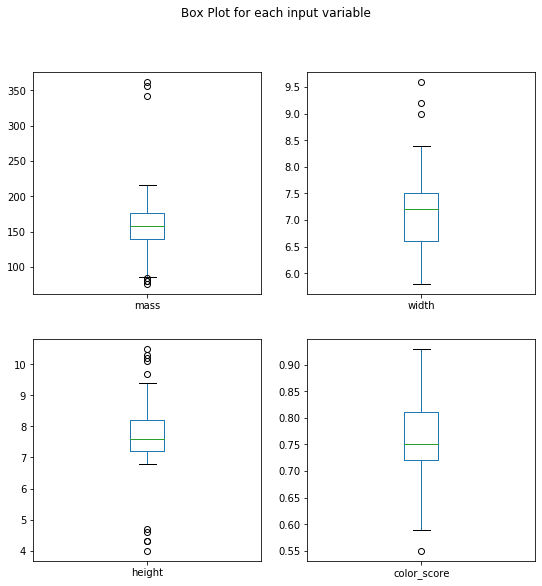

In [8]:
fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('fruits_boxplot')
plt.show()

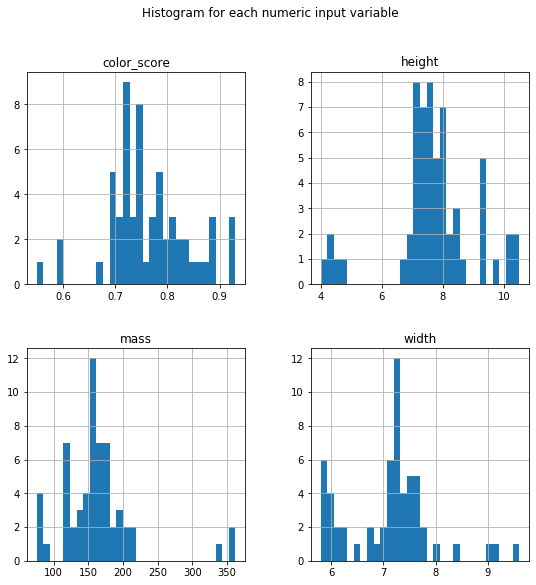

In [9]:
import pylab as pl
fruits.drop('fruit_label' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()

It looks like perhaps color score has a near Gaussian distribution.

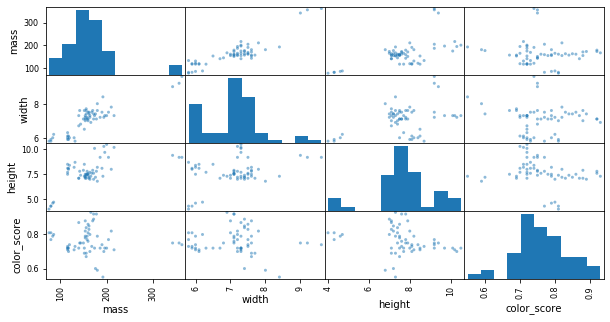

In [10]:
from pandas.plotting import scatter_matrix

scatter_matrix(fruits.drop('fruit_label', axis=1), figsize=(10, 5))
plt.show()

Some pairs of attributes are correlated (mass and width). This suggests a high correlation and a predictable relationship

In [11]:
feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']

In [12]:
X

,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80
4,84,6.0,4.6,0.79
5,80,5.8,4.3,0.77
6,80,5.9,4.3,0.81
7,76,5.8,4.0,0.81
8,178,7.1,7.8,0.92
9,172,7.4,7.0,0.89


In [13]:
y

0     1
1     1
2     1
3     2
4     2
5     2
6     2
7     2
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    3
25    3
26    3
27    3
28    3
29    3
30    3
31    3
32    3
33    3
34    3
35    3
36    3
37    3
38    3
39    3
40    3
41    3
42    3
43    4
44    4
45    4
46    4
47    4
48    4
49    4
50    4
51    4
52    4
53    4
54    4
55    4
56    4
57    4
58    4
Name: fruit_label, dtype: int64

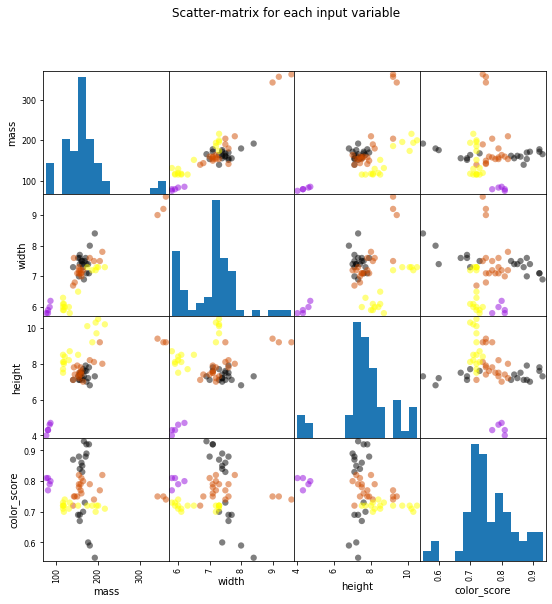

In [14]:
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

### Create training and test sets

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Apply scalling

minmaxscaler --> it scales the features to a given range between 0-1

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Build Models

WE HAVE SET TWO VARIABLES, MODEL AND TRAINED_MODEL, THE MODEL CONTAINS THE DIFFERENT CLASSIFIERS, AND THE TRAINED_MODEL THE MODEL ALREADY FITTED. SO CHOOSE ONE MODEL AND THEN PERFORM EVALUATION METRICS. 
### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
trained_model=model.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.70
Accuracy of Logistic regression classifier on test set: 0.40


/Users/mariabrullmartinez/anaconda3/envs/uni/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mariabrullmartinez/anaconda3/envs/uni/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
trained_model= model.fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))


Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.87


/Users/mariabrullmartinez/anaconda3/envs/uni/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


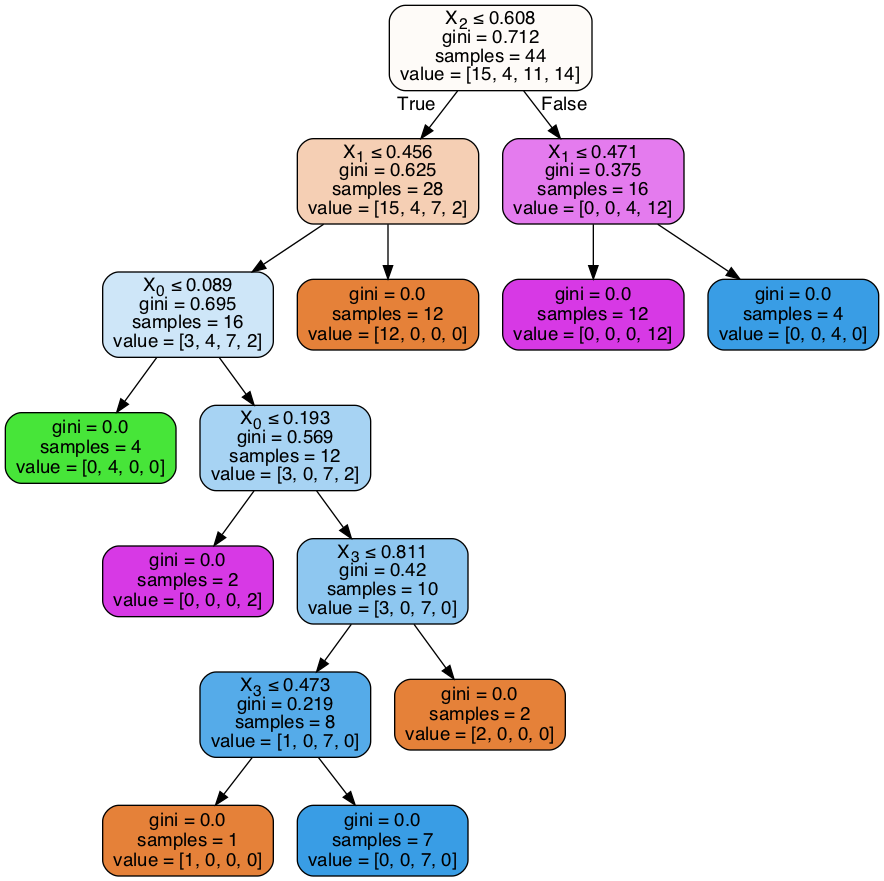

In [19]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### Setting max decision tree depth to help avoid overfitting

In [20]:
model = DecisionTreeClassifier(max_depth=3, max_leaf_nodes = 19, min_samples_split = 3)
trained_model =model.fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.89
Accuracy of Decision Tree classifier on test set: 0.73


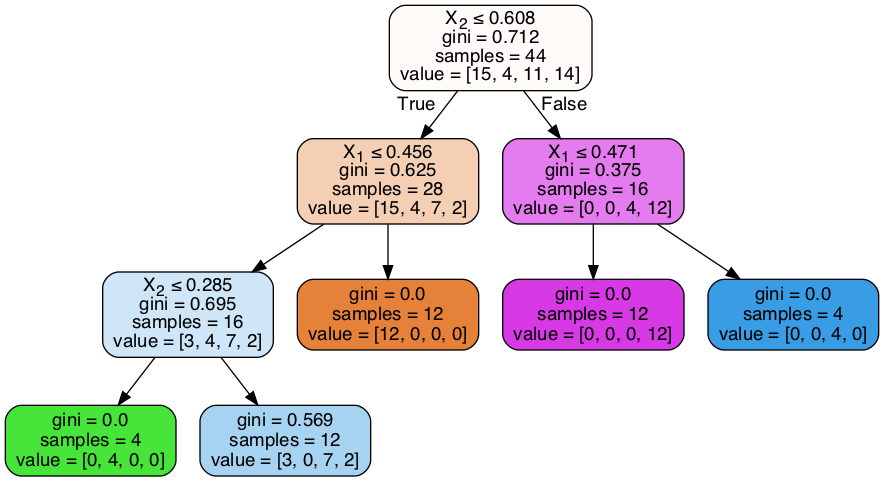

In [21]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### K-Nearest Neighbors

In [22]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
trained_model = model.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00


### Linear Discriminant Analysis

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis()
trained_model = model.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.86
Accuracy of LDA classifier on test set: 0.67


### Gaussian Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
trained_model = model.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.86
Accuracy of GNB classifier on test set: 0.67


### Support Vector Machine

In [25]:
from sklearn.svm import SVC

model = SVC()
trained_model = model.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.61
Accuracy of SVM classifier on test set: 0.33


/Users/mariabrullmartinez/anaconda3/envs/uni/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [26]:
# CROSS VALIDATION

In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model,X_train, y_train,
                        scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)

/Users/mariabrullmartinez/anaconda3/envs/uni/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [43]:
def display_scores (scores):
    print ('Scores:', scores)
    print ('Mean:', scores.mean())
    print ('Standard Deviation:' , scores.std())
    
display_scores(rmse_scores)

Scores: [1.06904497 0.91287093 0.81649658 0.40824829 0.         0.
 1.15470054 0.         1.15470054 0.        ]
Mean: 0.5516061844975066
Standard Deviation: 0.4933048396713236


In [29]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model,X_train, y_train,
                        scoring='accuracy', cv=10)

/Users/mariabrullmartinez/anaconda3/envs/uni/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/mariabrullmartinez/anaconda3/envs/uni/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/mariabrullmartinez/anaconda3/envs/uni/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/mariabrull

In [30]:
scores

array([0.42857143, 0.66666667, 0.66666667, 0.66666667, 0.75      ,
       0.33333333, 0.66666667, 0.66666667, 0.33333333, 0.66666667])

The KNN algorithm was the most accurate model that we tried. The confusion matrix provides an indication of one error made.

Finally, the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (However, the test set was small).

# CONFUSSION MATRIX

In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4 0 0 0]
 [0 1 0 0]
 [4 0 3 1]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         4
           2       1.00      1.00      1.00         1
           3       1.00      0.38      0.55         8
           4       0.67      1.00      0.80         2

    accuracy                           0.67        15
   macro avg       0.79      0.84      0.75        15
weighted avg       0.82      0.67      0.64        15



### Plot the decision boundary of the k-nn classifier

In [32]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
from sklearn.neighbors import KNeighborsClassifier

X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].as_matrix()
    y_mat = y.as_matrix()

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

        
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    
    plt.show()

/Users/mariabrullmartinez/anaconda3/envs/uni/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/Users/mariabrullmartinez/anaconda3/envs/uni/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


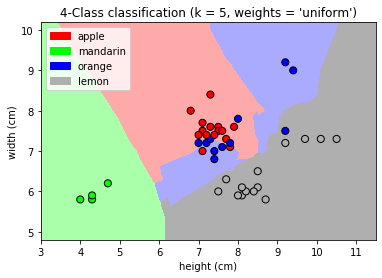

In [33]:
plot_fruit_knn(X_train, y_train, 5, 'uniform')

/Users/mariabrullmartinez/anaconda3/envs/uni/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/Users/mariabrullmartinez/anaconda3/envs/uni/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


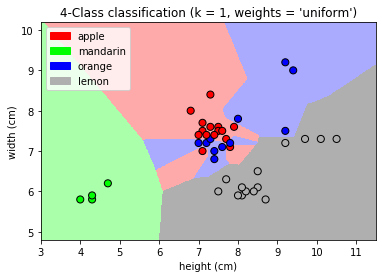

In [34]:
plot_fruit_knn(X_train, y_train, 1, 'uniform')

/Users/mariabrullmartinez/anaconda3/envs/uni/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/Users/mariabrullmartinez/anaconda3/envs/uni/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


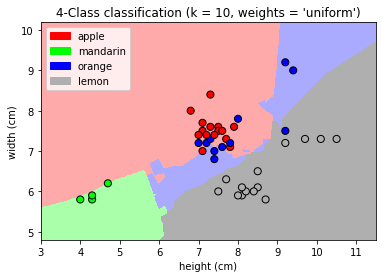

In [35]:
plot_fruit_knn(X_train, y_train, 10, 'uniform')

KNN-->TEST

/Users/mariabrullmartinez/anaconda3/envs/uni/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
/Users/mariabrullmartinez/anaconda3/envs/uni/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


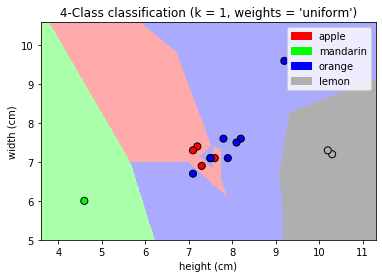

In [40]:
plot_fruit_knn(X_test, y_test, 1, 'uniform')

([<matplotlib.axis.XTick at 0x1a2376f410>,
 <a list of 5 Text xticklabel objects>)

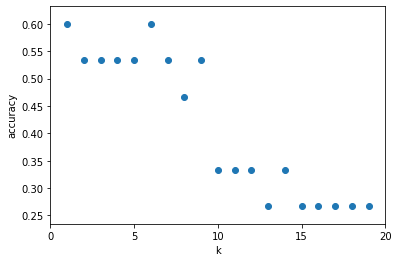

In [37]:
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

For this particular dateset, we obtain the highest accuracy when k=5.